In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.ml.feature import VectorAssembler
import numpy as np
from pyspark.mllib.stat import Statistics
import os
import pandas as pd

In [18]:
import pyspark.mllib.stat
from numpy import array
from pyspark.mllib.linalg import Vectors
#read in the data and filter out the header
rdd_vec = sc.textFile("final_nba.csv")
rdd_vec.count()
header = rdd_vec.first() #extract header
data = rdd_vec.filter(lambda row: row not in header) #filter out the header!
data.count()

128069

In [1]:
def plot_histogram_stats(vector_of_results,title):
    plt.hist(vector_of_results, color = 'c', bins=20)
    plt.axvline(max(vector_of_results), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(np.mean(vector_of_results), color='r', linestyle='dashed', linewidth=2)
    plt.title(title)
    return plt

In [19]:
print header
data.first()

label,SHOT_NUMBER,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,home,time


u'1,1,2,1.9,7.7,2,1.3,0,10.85'

In [5]:
parsedData = data.map(lambda s: Vectors.dense(s.split(',')))
means = parsedData.mean()
means

DenseVector([64034.0, 6.5069, 2.0234, 2.7659, 13.5715, 2.2647, 4.123, 0.4521, 0.4992, 23.7766])

In [9]:
summary = Statistics.colStats(parsedData)

In [11]:
summary.variance()

array([  1.36681640e+09,   2.22148168e+01,   1.20948180e+01,
         9.26400155e+00,   7.90136737e+01,   1.94621229e-01,
         7.59799711e+00,   2.47711267e-01,   2.50001336e-01,
         2.01645998e+02])

In [27]:
%%time
summary.numNonzeros()

CPU times: user 1.51 ms, sys: 1.23 ms, total: 2.75 ms
Wall time: 5.27 ms


array([ 128068.,  128069.,   64874.,  125023.,  128065.,  128069.,
        127013.,   57905.,   63934.,  128069.])

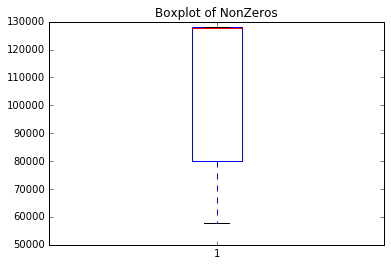

In [13]:
plt.boxplot(summary.numNonzeros())
plt.title("Boxplot of NonZeros")

In [14]:
negatives_rdd = parsedData.filter(lambda line: line[0] == 0)
positives_rdd = parsedData.filter(lambda line: line[0] == 1)

In [23]:
summary_pos = Statistics.colStats(positives_rdd)
summary_pos.mean()

array([  1.        ,   6.46356964,   1.89170193,   2.61413177,
        11.69573785,   2.20576807,   4.11975477,   0.5036698 ,  23.52081542])

In [24]:
summary_neg = Statistics.colStats(negatives_rdd)
summary_neg.mean()

array([  0.        ,   6.5426572 ,   2.13200502,   2.89115358,
        15.11953851,   2.31328031,   4.12570549,   0.49553902,  23.98761402])

#### The most noticeable difference is distance of shot

In [25]:
responses = parsedData.map(lambda line: line[0]).collect()

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

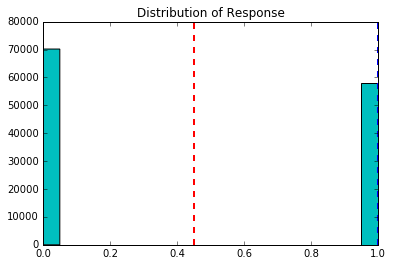

In [26]:
plot_histogram_stats(responses, "Distribution of Response")